In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('Data/iris.csv')

In [34]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
X = df.iloc[:,:2]
X

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [37]:
y = pd.factorize(df['variety'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [40]:
X_train.shape

(105, 2)

In [41]:
y_test.shape

(45,)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(X_train)

StandardScaler()

In [46]:
scaler.mean_

array([5.84190476, 3.07047619])

In [47]:
scaler.var_

array([0.64681542, 0.19484263])

In [48]:
X_train = scaler.transform(X_train)

In [49]:
# 1.
# scaler2 = StandardScaler()
# scaler2.fit(X_test)
# scaler2.mean_
# X_test = scaler2.transform(X_test)

In [50]:
# 2.
X_test = scaler.transform(X_test)

In [51]:
model = KNeighborsClassifier(n_neighbors=10)

In [52]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
y_predicted = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test, y_predicted)

array([[14,  1,  0],
       [ 0, 10,  5],
       [ 0,  5, 10]])

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

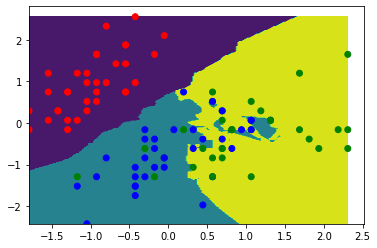

In [57]:
x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min, y_max = X_train[:,1].min(), X_train[:,1].max()

step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)

plt.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train, cmap=ListedColormap(['red', 'blue', 'green']))